## Machine learning 

### Trying classical ML models to classify epilepsy from 5s EEG segments of 10 patients (5 per class)

In [20]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer


In [58]:
df = pd.read_csv("eeg_features_updated.csv")
display(df.head())
display(df.shape)

,epoch,subject_id,age,gender,epilepsy,edf_path,EEG_FP1-REF_mean,EEG_FP1-REF_var,EEG_FP1-REF_skew,EEG_FP1-REF_kurtosis,...,EEG_C3-REF_D4_entropy,EEG_C3-REF_D3_energy,EEG_C3-REF_D3_var,EEG_C3-REF_D3_entropy,EEG_C3-REF_D2_energy,EEG_C3-REF_D2_var,EEG_C3-REF_D2_entropy,EEG_C3-REF_D1_energy,EEG_C3-REF_D1_var,EEG_C3-REF_D1_entropy
0,0,aaaaamhx,57,F,0,data/01_no_epilepsy/aaaaamhx/s001_2011/01_tcp_...,0.009299,1.734234,-0.063173,2.289125,...,5.367339,459.321649,2.806489,6.309408,319.511279,1.007919,7.132503,14.579054,0.023215,8.225130
1,1,aaaaamhx,57,F,0,data/01_no_epilepsy/aaaaamhx/s001_2011/01_tcp_...,0.015663,1.115208,-0.260017,2.884725,...,5.007677,393.298458,2.419382,6.194655,342.057295,1.079031,7.352158,16.678259,0.026558,8.248752
2,2,aaaaamhx,57,F,0,data/01_no_epilepsy/aaaaamhx/s001_2011/01_tcp_...,-0.058171,0.727833,-0.272666,3.046625,...,5.182943,470.299936,2.854250,6.179168,523.943746,1.652818,7.189073,22.688620,0.036128,8.146665
3,3,aaaaamhx,57,F,0,data/01_no_epilepsy/aaaaamhx/s001_2011/01_tcp_...,0.094949,1.003312,-0.355441,2.808585,...,5.653115,396.474095,2.447306,6.114523,370.129190,1.167599,7.301302,15.320699,0.024396,8.242386
4,4,aaaaamhx,57,F,0,data/01_no_epilepsy/aaaaamhx/s001_2011/01_tcp_...,-0.058505,1.111426,-0.409155,4.206512,...,4.983623,250.395556,1.516708,6.313032,399.909855,1.261536,7.165472,15.472321,0.024637,8.163821


(558, 146)

In [59]:
df.describe()

,epoch,age,epilepsy,EEG_FP1-REF_mean,EEG_FP1-REF_var,EEG_FP1-REF_skew,EEG_FP1-REF_kurtosis,EEG_FP1-REF_zcr,EEG_FP1-REF_tkeo,EEG_FP1-REF_delta_power,...,EEG_C3-REF_D4_entropy,EEG_C3-REF_D3_energy,EEG_C3-REF_D3_var,EEG_C3-REF_D3_entropy,EEG_C3-REF_D2_energy,EEG_C3-REF_D2_var,EEG_C3-REF_D2_entropy,EEG_C3-REF_D1_energy,EEG_C3-REF_D1_var,EEG_C3-REF_D1_entropy
count,558.000000,558.000000,558.000000,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02,558.000000
mean,2.500000,52.602151,0.516129,-9.388647e-18,0.993878,0.412684,6.963246,0.084008,0.112065,0.438648,...,4.787394,104.927858,0.645460,5.778421,52.245779,0.164809,6.712594,3.406942,5.425061e-03,7.708769
std,1.709357,16.355876,0.500188,7.745533e-02,0.723151,1.573306,6.798503,0.057793,0.149845,0.164612,...,0.924803,107.352106,0.659803,1.099441,93.873716,0.296128,1.192355,7.316701,1.165079e-02,1.173171
min,0.000000,20.000000,0.000000,-5.156400e-01,0.000260,-5.528271,1.872974,0.000000,0.000008,0.007319,...,0.338956,0.002108,0.000013,0.634064,0.000344,0.000001,1.432984,0.000020,3.111819e-08,2.555927
25%,1.000000,43.000000,0.000000,-3.284994e-02,0.534476,-0.255694,3.018604,0.038431,0.022258,0.323174,...,4.784669,28.329073,0.174644,5.970378,8.995496,0.028376,6.940956,0.452599,7.206984e-04,7.933967
50%,2.500000,52.000000,1.000000,4.311617e-03,0.916370,0.060904,4.109026,0.070456,0.060632,0.469923,...,5.140940,70.154312,0.432775,6.170415,20.943959,0.066063,7.147853,1.079828,1.719470e-03,8.160526
75%,4.000000,62.000000,1.000000,3.513345e-02,1.227696,0.892315,7.582813,0.116693,0.137869,0.574757,...,5.302453,144.796324,0.892253,6.264257,49.164742,0.155092,7.246568,2.704095,4.305879e-03,8.234552
max,5.000000,87.000000,1.000000,3.912818e-01,5.677323,5.280837,40.407009,0.261009,1.199407,0.813804,...,5.674423,619.592644,3.814091,6.539293,721.966985,2.277495,7.421682,62.534322,9.957694e-02,8.377004


Prepare the dataset for ML:
- Drop useless columns (ids, irrelevant for the model, etc)
- Separate labels from features (X, y)
- Train test split
- Sci-kit learn pre-processing: 
-> Standardize of numerical variables  
-> One-hot-encode of categorical variables

In [60]:
# Drop useless columns for the model
df = df.drop("edf_path", axis=1)

# Define the target 
target_name = "epilepsy"

# Patient-level train/test split
""" Splitting by unique subject ID (and not simply by individual samples since multiple samples can come from the same patient) 
To guarantee that no data from the same patient appears in both train and test sets
This is critical to prevent patient-level leakage and evaluate generalization to new patients in clinical settings
"""

unique_ids = df['subject_id'].unique()
stratify_labels = df.drop_duplicates('subject_id')[target_name]

train_ids, test_ids = train_test_split(
    unique_ids, test_size=0.2, random_state=0, stratify=stratify_labels
)

## Train/test splits based on subject IDs
train_df = df[df['subject_id'].isin(train_ids)]
test_df  = df[df['subject_id'].isin(test_ids)]

## Separate features and labels
X_train, Y_train = train_df.drop(columns=target_name), train_df[target_name]
X_test, Y_test = test_df.drop(columns=target_name), test_df[target_name]


In [61]:
### Sci-kit Learn Preprocessing ###

## Drop patient IDs now
X_train = X_train.drop("subject_id", axis=1)
X_test = X_test.drop("subject_id", axis=1)

# Automatically detect names of numeric/categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=object).columns.tolist()

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

# Create pipeline for categorical features
categorical_transformer = Pipeline(steps=[
        ("encoder",OneHotEncoder(drop="first"))
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Preprocessings on train set
X_train_transformed = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test_transformed = preprocessor.transform(X_test)


### PCA
Apply PCA to reduce dimensions since dataset contains over 140 features with  only 54 examples.

In [62]:
from sklearn.decomposition import PCA

# Apply PCA after preprocessing
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of variance

X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

print(f"Reduced to {X_train_pca.shape[1]} components")


Reduced to 30 components


In [63]:
# Explained variance per component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.27494319 0.15147873 0.12407794 0.07997903 0.06126853 0.03162079
 0.024889   0.02047639 0.01962542 0.0171201  0.01632792 0.01347847
 0.01328437 0.01004403 0.00957155 0.00849407 0.00825196 0.00722392
 0.00671686 0.00620865 0.00602062 0.00566192 0.00544709 0.00519299
 0.00445515 0.00420188 0.00399126 0.00373666 0.0035597  0.00326192]


### Baseline Model: Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Train logistic regression on PCA-transformed data
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_pca, Y_train)

# Predict class labels
Y_train_pred = classifier.predict(X_train_pca)
Y_test_pred = classifier.predict(X_test_pca)

# Predict class probabilities
Y_train_proba = classifier.predict_proba(X_train_pca)
Y_test_proba = classifier.predict_proba(X_test_pca)

# Evaluate performance
# Confusion matrix: [ [TN, FP], [FN, TP] ]
cm = confusion_matrix(Y_test, Y_test_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity & Specificity
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set     : ", accuracy_score(Y_test, Y_test_pred))

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set     : ", f1_score(Y_test, Y_test_pred))

print("sensitivity : ", sensitivity)
print("specificity : ", specificity)



accuracy on training set :  0.7286324786324786
accuracy on test set     :  0.5222222222222223
f1-score on training set :  0.7381443298969073
f1-score on test set     :  0.5742574257425742
sensitivity :  0.6041666666666666
specificity :  0.42857142857142855


In [65]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# Check the average score with a cross-validation (here using K=10)
scores = cross_val_score(classifier, X_train_pca, Y_train, cv=10)
avg = scores.mean()
std = scores.std()

print(avg)
print(std)

0.6216003700277521
0.10806941651404428


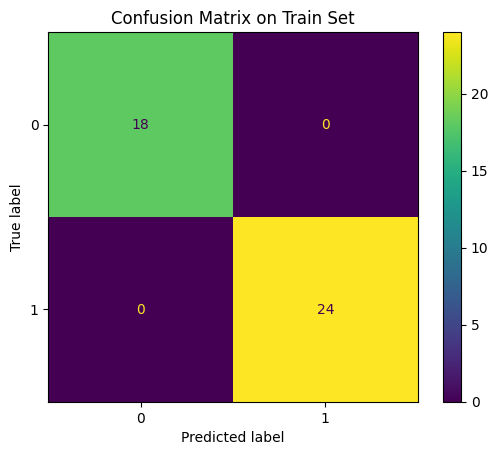

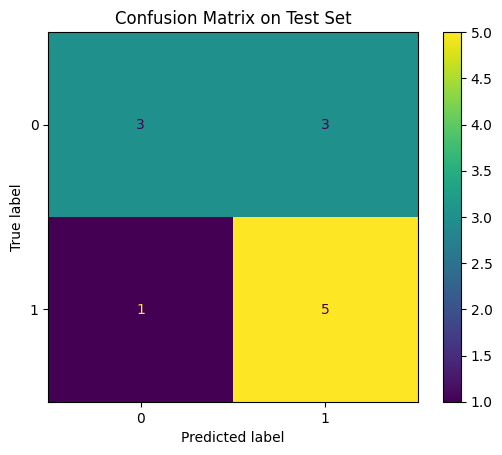

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Confusion matrix on training set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Train Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train_pca, Y_train, ax=ax)
plt.show()

# Confusion matrix on test set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Test Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test_pca, Y_test, ax=ax)
plt.show()


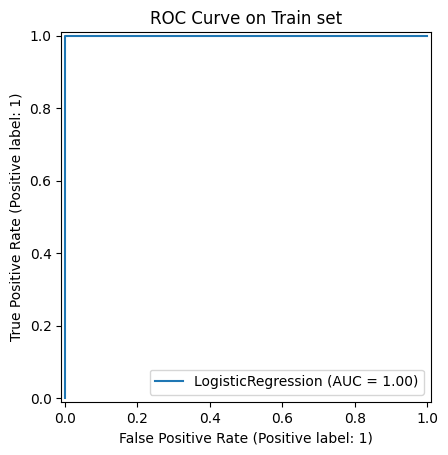

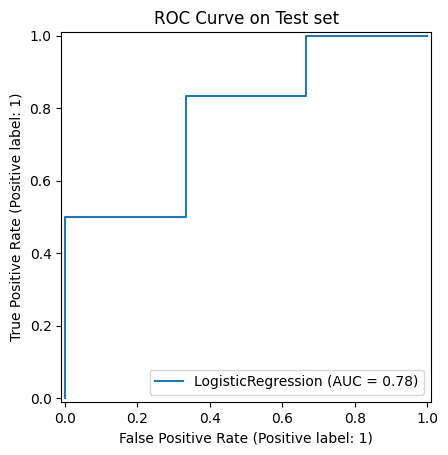

In [55]:
# Visualize ROC curves
_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_train_pca, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_test_pca, Y_test, ax=ax) 
plt.show()


In [7]:
!pip install xgboost
import sys
!{sys.executable} -m pip install xgboost

/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/bin/pip: line 2: /Users/soniahalhol/Jedha ML Engineering/Projects/9_Final_project/.venv/bin/python: No such file or directory
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/bin/pip: line 2: exec: /Users/soniahalhol/Jedha ML Engineering/Projects/9_Final_project/.venv/bin/python: cannot execute: No such file or directory
  Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl (2.2 MB)


### XGBoost

In [8]:
from xgboost import XGBClassifier

# Train XGBoost model
xgboost = XGBClassifier()
xgboost.fit(X_train_pca, Y_train)

# Predictions
Y_train_pred = xgboost.predict(X_train_pca)
Y_test_pred = xgboost.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print scores
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set     : ", accuracy_score(Y_test, Y_test_pred))
print("F1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("F1-score on test set     : ", f1_score(Y_test, Y_test_pred))
print("Sensitivity              : ", sensitivity)
print("Specificity              : ", specificity)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]
